In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import rfft, rfftfreq

Q1) Size (samples): 10000
    Duration (s):   10.0


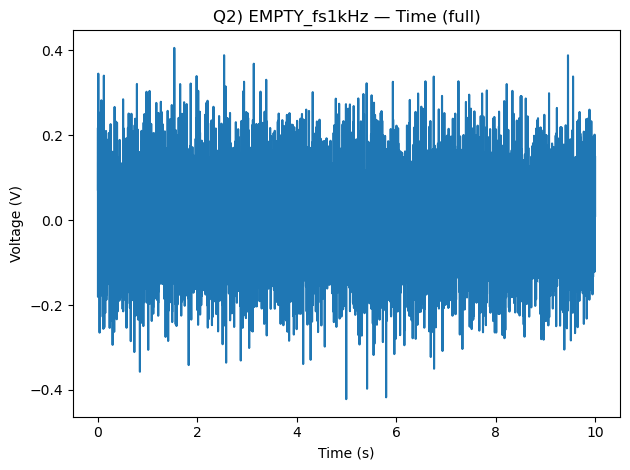

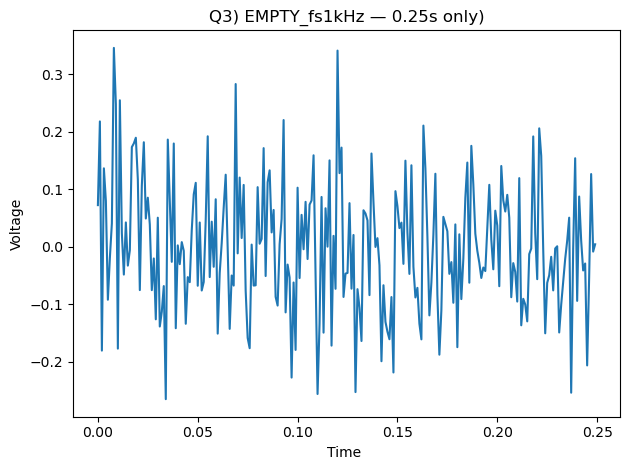

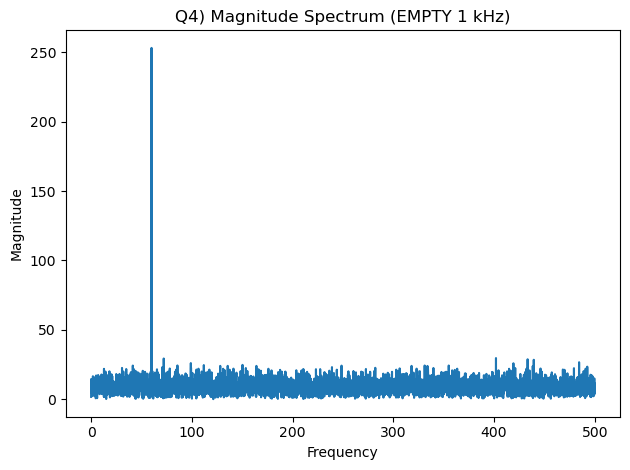

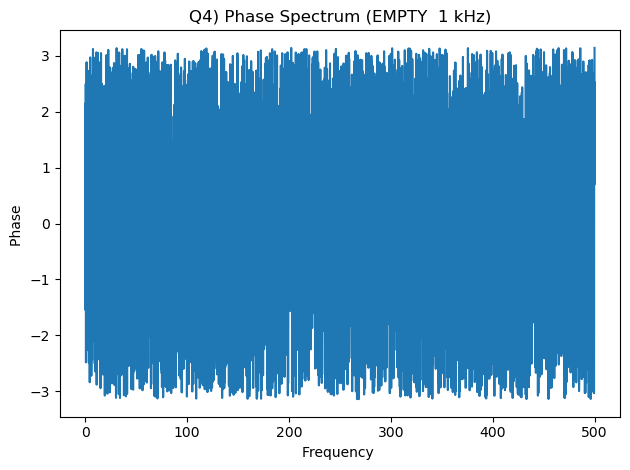

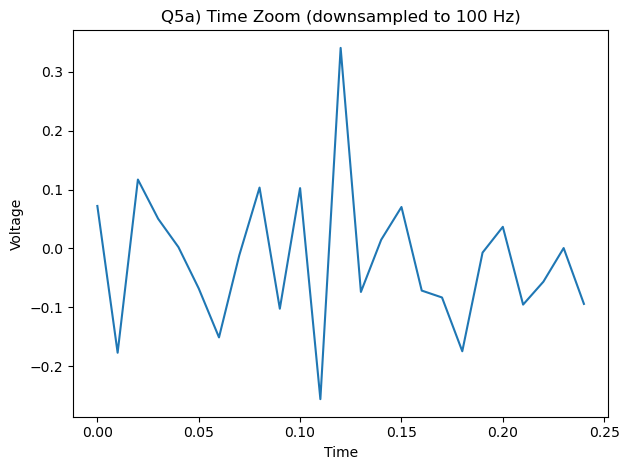

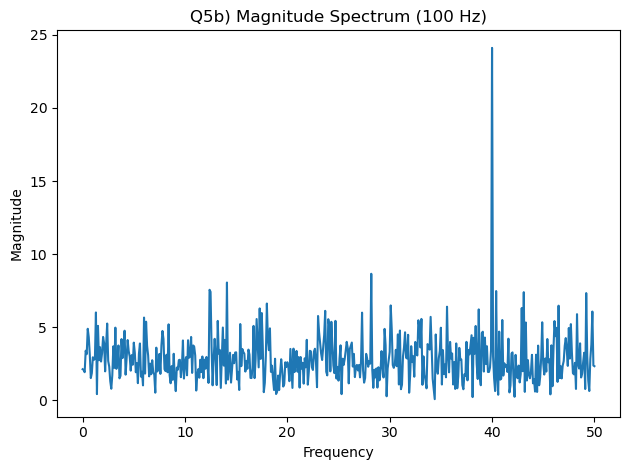

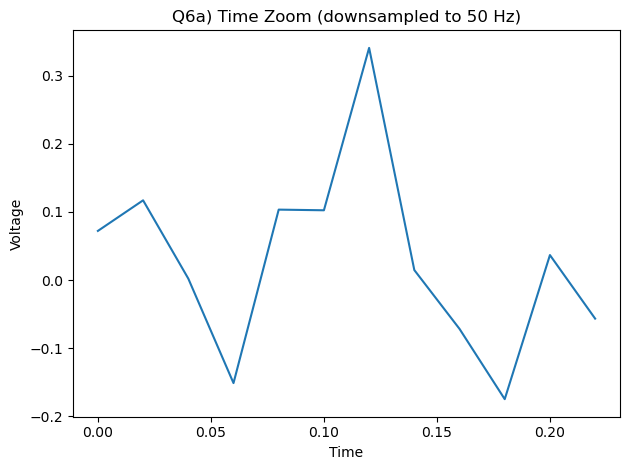

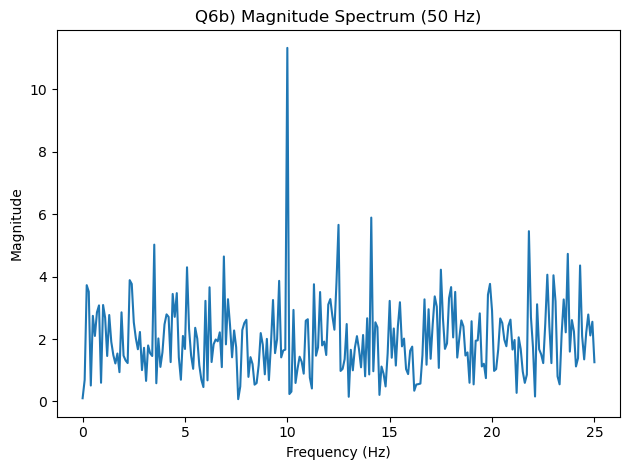

Q7a) Convolution result length (full): 10000 samples
     Duration of full result: 10.0


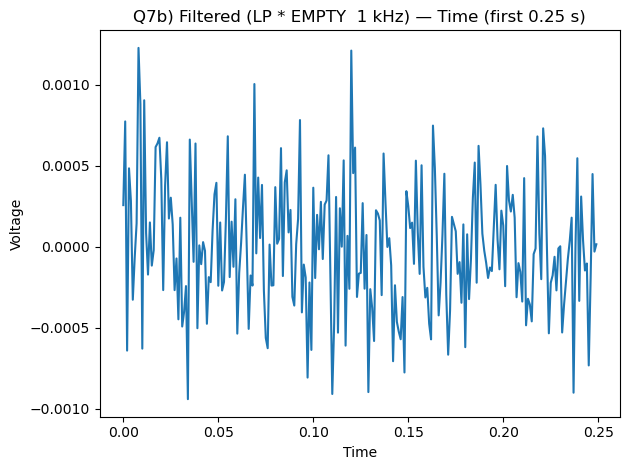

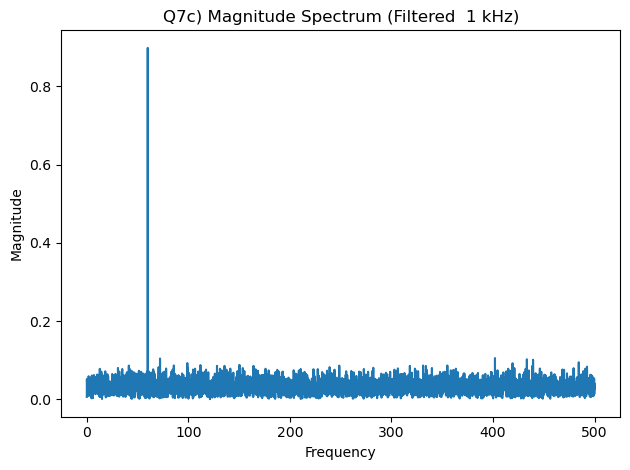

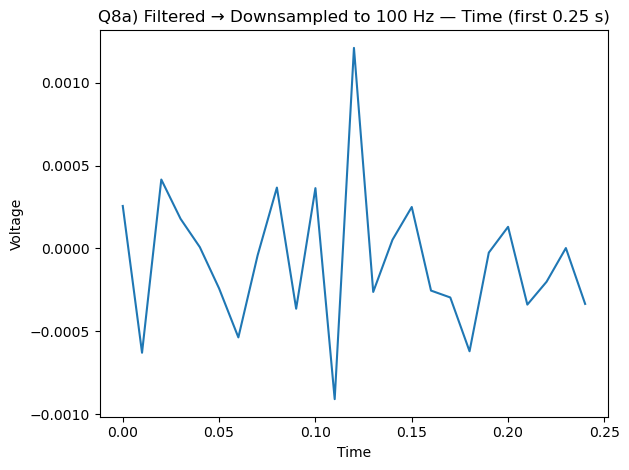

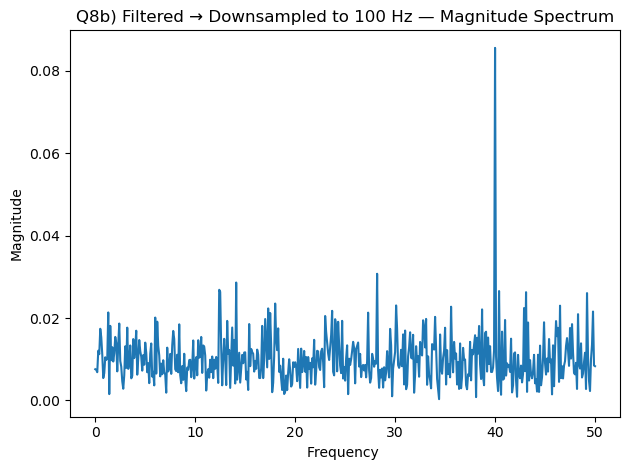


Q8c) Note:
- #5B downsampled the raw noisy signal, so high frequencies (like 60 Hz) alias (fold) into lower ones.
- #7C filtered first (cutoff ~40 Hz), so the 60 Hz is reduced and the spectrum looks cleaner.
- Comparing 5B, 6B, 7C: the 60 Hz component moves/changes when you downsample without filtering (aliasing),
  but is reduced when you filter before downsampling.


In [ ]:

# Load data
empty = pd.read_csv("empty_fs1kHz.csv", header=None).iloc[:,0].values.astype(float)   # original signal @ 1000 Hz
h_lp  = pd.read_csv("LP_fs1000Hz_fc40Hz.csv", header=None).iloc[:,0].values.astype(float)  # low-pass filter impulse

fs = 1000.0               # samples per second
zoom_seconds = 0.25       # for time zoom plots
N = len(empty)            # number of samples
t = np.arange(N) / fs     # time 


# Q1) size + duration

duration = N / fs
print("Q1) Size (samples):", N)
print("    Duration (s):  ", duration)


# Q2) full time plot

plt.figure()
plt.plot(t, empty)
plt.title("Q2) EMPTY_fs1kHz — Time (full)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.tight_layout()
plt.show()


# Q3) 0.25 s time zoom
n_zoom = int(zoom_seconds * fs)
plt.figure()
plt.plot(t[:n_zoom], empty[:n_zoom])
plt.title("Q3) EMPTY_fs1kHz — 0.25s only)")
plt.xlabel("Time ")
plt.ylabel("Voltage")
plt.tight_layout()
plt.show()


# Q4) Frequency analysis (full)
# rFFT gives single-sided spectrum (0..Nyquist) #is that corerct?

X = np.fft.rfft(empty)
f = np.fft.rfftfreq(N, d=1/fs) # i get help from chatgpt but I am a little lost
mag = np.abs(X)
phase = np.angle(X)

plt.figure()
plt.plot(f, mag)
plt.title("Q4) Magnitude Spectrum (EMPTY 1 kHz)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(f, phase)
plt.title("Q4) Phase Spectrum (EMPTY  1 kHz)")
plt.xlabel("Frequency ")
plt.ylabel("Phase ")
plt.tight_layout()
plt.show()


# Q5) Downsample to 100 Hz (keep every 10th sample)
factor_100 = 10
empty_100 = empty[::factor_100]
fs_100 = fs / factor_100
t_100 = np.arange(len(empty_100)) / fs_100

# Q5a) time zoom
n_zoom_100 = int(zoom_seconds * fs_100)
plt.figure()
plt.plot(t_100[:n_zoom_100], empty_100[:n_zoom_100])
plt.title("Q5a) Time Zoom (downsampled to 100 Hz)")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.tight_layout()
plt.show()

# Q5b) magnitude spectrum
X_100 = np.fft.rfft(empty_100)
f_100 = np.fft.rfftfreq(len(empty_100), d=1/fs_100)
mag_100 = np.abs(X_100)

plt.figure()
plt.plot(f_100, mag_100)
plt.title("Q5b) Magnitude Spectrum (100 Hz)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()


# Q6) Downsample to 50 Hz (keep every 20th sample)
factor_50 = 20
empty_50 = empty[::factor_50]
fs_50 = fs / factor_50
t_50 = np.arange(len(empty_50)) / fs_50

# Q6a) time zoom
n_zoom_50 = int(zoom_seconds * fs_50)
plt.figure()
plt.plot(t_50[:n_zoom_50], empty_50[:n_zoom_50])
plt.title("Q6a) Time Zoom (downsampled to 50 Hz)")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.tight_layout()
plt.show()

# Q6b) magnitude spectrum
X_50 = np.fft.rfft(empty_50)
f_50 = np.fft.rfftfreq(len(empty_50), d=1/fs_50)
mag_50 = np.abs(X_50)

plt.figure()
plt.plot(f_50, mag_50)
plt.title("Q6b) Magnitude Spectrum (50 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()


# Q7) Filter original 1 kHz signal by convolution with LP filter
# mode="full" shows true convolution length (N + M - 1)
# mode="same" keeps same length as input (nice for plotting)

y_full = np.convolve(empty, h_lp, mode="full")
y_same = np.convolve(empty, h_lp, mode="same")

print("Q7a) Convolution result length (full):", len(y_full), "samples")
print("     Duration of full result:", len(y_full) / fs)

# Q7b) time zoom of filtered (same length)
plt.figure()
plt.plot(t[:n_zoom], y_same[:n_zoom])
plt.title("Q7b) Filtered (LP * EMPTY  1 kHz) — Time (first 0.25 s)")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.tight_layout()
plt.show()

# Q7c) magnitude spectrum of filtered (same length)
Y = np.fft.rfft(y_same)
f_y = np.fft.rfftfreq(len(y_same), d=1/fs)
mag_y = np.abs(Y)

plt.figure()
plt.plot(f_y, mag_y)
plt.title("Q7c) Magnitude Spectrum (Filtered  1 kHz)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()


# Q8) Take filtered result, downsample to 100 Hz

y_100 = y_same[::factor_100]
t_y100 = np.arange(len(y_100)) / fs_100

# Q8a) time zoom
n_zoom_y100 = int(zoom_seconds * fs_100)
plt.figure()
plt.plot(t_y100[:n_zoom_y100], y_100[:n_zoom_y100])
plt.title("Q8a) Filtered → Downsampled to 100 Hz — Time (first 0.25 s)")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.tight_layout()
plt.show()

# Q8b) magnitude spectrum
Y_100 = np.fft.rfft(y_100)
f_y100 = np.fft.rfftfreq(len(y_100), d=1/fs_100)
mag_y100 = np.abs(Y_100)

plt.figure()
plt.plot(f_y100, mag_y100)
plt.title("Q8b) Filtered → Downsampled to 100 Hz — Magnitude Spectrum")
plt.xlabel("Frequency ")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()

# Q8c) quick note printed
print("\nQ8c) Note:")
print("- #5B downsampled the raw noisy signal, so high frequencies (like 60 Hz) fold into lower ones.")
print("- #7C filtered first (cutoff ~40 Hz), so the 60 Hz is reduced and the spectrum looks cleaner.")
print("- Comparing 5B, 6B, 7C: the 60 Hz component moves/changes when you downsample without filtering,")
print("  but is reduced when you filter before downsampling.")

